In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('text.csv')

In [3]:
df.shape

(40000, 10)

In [51]:
df.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


In [4]:
df.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


In [5]:
df=df[['Text','Cat1']]

In [6]:
df.head()

,Text,Cat1
0,The description and photo on this product need...,grocery gourmet food
1,This was a great book!!!! It is well thought t...,toys games
2,"I am a first year teacher, teaching 5th grade....",toys games
3,I got the book at my bookfair at school lookin...,toys games
4,Hi! I'm Martine Redman and I created this puzz...,toys games


In [7]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
   
df['Cat2']= label_encoder.fit_transform(df['Cat1']) 
  
df['Cat2'].unique() 

array([2, 5, 1, 3, 0, 4])

In [8]:
df.head()

,Text,Cat1,Cat2
0,The description and photo on this product need...,grocery gourmet food,2
1,This was a great book!!!! It is well thought t...,toys games,5
2,"I am a first year teacher, teaching 5th grade....",toys games,5
3,I got the book at my bookfair at school lookin...,toys games,5
4,Hi! I'm Martine Redman and I created this puzz...,toys games,5


In [9]:
df.isnull().sum()

Text    0
Cat1    0
Cat2    0
dtype: int64

<Axes: >

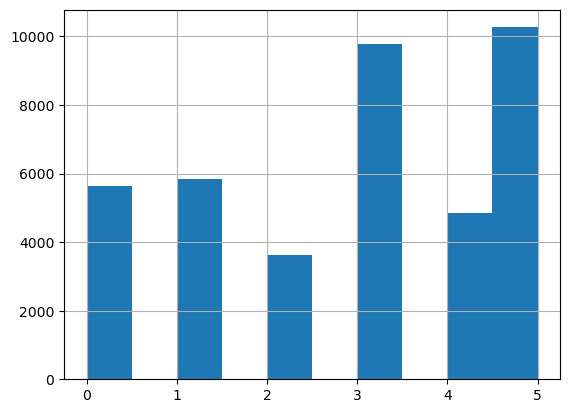

In [10]:
df['Cat2'].hist()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(df['Text'],df['Cat2'],test_size=0.2,random_state=148,stratify=df['Cat2'])

In [13]:
x_train.shape

(32000,)

In [14]:
x_test.shape

(8000,)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer   

from sklearn.naive_bayes import MultinomialNB

In [16]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [17]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [18]:
y_pred=mnb.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1128
           1       0.84      0.81      0.82      1169
           2       0.86      0.79      0.83       723
           3       0.77      0.78      0.78      1955
           4       0.91      0.81      0.86       972
           5       0.86      0.92      0.89      2053

    accuracy                           0.83      8000
   macro avg       0.84      0.83      0.83      8000
weighted avg       0.84      0.83      0.83      8000



In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Accuracy score:  0.83475


In [21]:
cmd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))


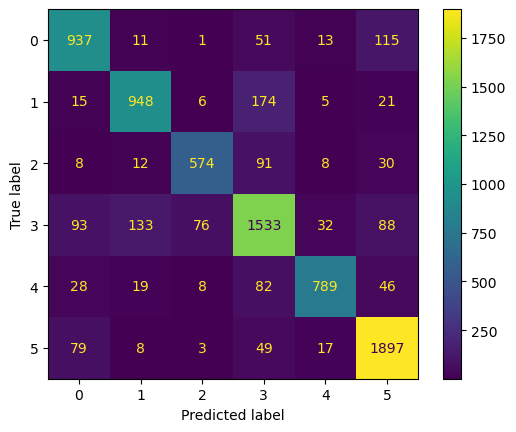

In [22]:
import matplotlib.pyplot as plt
cmd.plot()
plt.show()

In [23]:
def test(review):
    review_list = [review]
    rw=vectorizer.transform(review_list)
    x=mnb.predict(rw)
    return label_encoder.inverse_transform(x)[0]

In [24]:
test('The Johnsons hamper is very good for children')

'baby products'